In [1]:
from sympy import *
init_printing(use_unicode = True)
from sympy.physics.secondquant import *
from IPython.display import display, Math
from sympy.physics.quantum import *

# FERMIONIC ALGEBRA

fu1 = symbols('a_{u_1}', commutative=False)
fdu1 = symbols('a_{u_1}^\dagger', commutative=False)
fd1 = symbols('a_{d_1}', commutative=False)
fdd1 = symbols('a_{d_1}^\dagger', commutative=False)
fu2 = symbols('a_{u_2}', commutative=False)
fdu2 = symbols('a_{u_2}^\dagger', commutative=False)
fd2 = symbols('a_{d_2}', commutative=False)
fdd2 = symbols('a_{d_2}^\dagger', commutative=False)

fermi  = Matrix([fu1,fd1,fu2,fd2])
fermid = Matrix([fdu1,fdd1,fdu2,fdd2])
ops = [fdu1,fu1,fdd1,fd1,fdu2,fu2,fdd2,fd2]

def dictionarize(strl):
    d = []
    counter = 0
    for i in strl:
        v = []
        if (i == fdu1) or (i == fu1):
            v.append(i)
            v.append(1+counter)
            d.append(v)
            counter = counter + 1
        elif (i == fdd1) or (i == fd1):
            v.append(i)
            v.append(100+counter)
            d.append(v)
            counter = counter + 1
        elif (i == fdu2) or (i == fu2):
            v.append(i)
            v.append(200+counter)
            d.append(v)
            counter = counter + 1
        elif (i == fdd2) or (i == fd2):
            v.append(i)
            v.append(300+counter)
            d.append(v)
            counter = counter + 1
        elif i not in ops:
            v.append(i)
            v.append(0)
            d.append(v)
    return d

def bubble_sort(strl):
    bubbles = dictionarize(strl)
    
    swapped = True
    asign = 1
    while swapped:
        swapped = False
        for i in range(len(bubbles)-1):
            if bubbles[i][1] > bubbles[i+1][1]:
                bubbles[i], bubbles[i+1] = bubbles[i+1], bubbles[i]
                asign = asign * (-1) # Update sign due to CAR
                #print(asign)
                #display(Math(latex(bubbles)))
                swapped = True
    
    strl.clear()
    for i in bubbles:
        strl.append(i[0])
            
    strl.append(asign)
    return strl

def subd(expr):
    return expr.subs({
        fu1*fu1 : 0,
        fdu1*fdu1 : 0,
        fd1*fd1 : 0,
        fdd1*fdd1 : 0,
        fu2*fu2 : 0,
        fdu2*fdu2 : 0,
        fd2*fd2 : 0,
        fdd2*fdd2 : 0
    }).subs({
        fdu1*fu1*fdu1*fu1 : fdu1*fu1,
        fdd1*fd1*fdd1*fd1 : fdd1*fd1,
        fdu2*fu2*fdu2*fu2 : fdu2*fu2,
        fdd2*fd2*fdd2*fd2 : fdd2*fd2,
    }).subs({
        fdu1*fu1*fdu1*fu1 : fdu1*fu1,
        fdd1*fd1*fdd1*fd1 : fdd1*fd1,
        fdu2*fu2*fdu2*fu2 : fdu2*fu2,
        fdd2*fd2*fdd2*fd2 : fdd2*fd2,
    }).subs({
        fdu1*fu1*fdu1*fu1 : fdu1*fu1,
        fdd1*fd1*fdd1*fd1 : fdd1*fd1,
        fdu2*fu2*fdu2*fu2 : fdu2*fu2,
        fdd2*fd2*fdd2*fd2 : fdd2*fd2,
    })

def fermionize(expr): 
    listexpr = [x.as_ordered_factors() for x in expr.as_ordered_terms()]
    listprov = []
    for i in listexpr:
        listprov.append(bubble_sort(i))
    
    exprout = 0
    for i in range(len(listprov)):
        prod = 1
        for j in range(len(listprov[i])):
            prod = prod*listprov[i][j]
            
        exprout = exprout + prod
        
    return subd(exprout)
    
mixed2= [fdu1*fu1,\
         fdd1*fd1,\
         fdu1*fd1,\
         fu1*fdd1,\
         fdu2*fu2,\
         fdd2*fd2,\
         fdu2*fd2,\
         fu2*fdd2,\
         fdu1*fd2,\
         fd1*fdu2,\
         fdd1*fu2,\
         fu1*fdd2,\
         fdu1*fu2,\
         fu1*fdu2,\
         fdd1*fd2,\
         fd1*fdd2]

         
mixed4 = [fd1*fdu2*fdd2*fd2,\
         fd1*fdu2*fu2*fdd2,\
         fdd1*fd1*fdd2*fd2,\
         fdd1*fd1*fdu2*fd2,\
         fdd1*fd1*fdu2*fu2,\
         fdd1*fd1*fu2*fdd2,\
         fdd1*fdu2*fu2*fd2,\
         fdd1*fu2*fdd2*fd2,\
         fdu1*fd1*fdd2*fd2,\
         fdu1*fd1*fdu2*fd2,\
         fdu1*fd1*fdu2*fu2,\
         fdu1*fd1*fu2*fdd2,\
         fdu1*fdd1*fd1*fd2,\
         fdu1*fdd1*fd1*fu2,\
         fdu1*fdd1*fu2*fd2,\
         fdu1*fdu2*fu2*fd2,\
         fdu1*fu1*fd1*fdd2,\
         fdu1*fu1*fd1*fdu2,\
         fdu1*fu1*fdd1*fd1,\
         fdu1*fu1*fdd1*fd2,\
         fdu1*fu1*fdd1*fu2,\
         fdu1*fu1*fdd2*fd2,\
         fdu1*fu1*fdu2*fd2,\
         fdu1*fu1*fdu2*fu2,\
         fdu1*fu1*fu2*fdd2,\
         fdu1*fu2*fdd2*fd2,\
         fdu2*fu2*fdd2*fd2,\
         fu1*fd1*fdu2*fdd2,\
         fu1*fdd1*fd1*fdd2,\
         fu1*fdd1*fd1*fdu2,\
         fu1*fdd1*fdd2*fd2,\
         fu1*fdd1*fdu2*fd2,\
         fu1*fdd1*fdu2*fu2,\
         fu1*fdd1*fu2*fdd2,\
         fu1*fdu2*fdd2*fd2,\
         fu1*fdu2*fu2*fdd2]

  
mixed6 = [fdd1*fd1*fdu2*fu2*fdd2*fd2,\
         fu1*fdd1*fdu2*fu2*fdd2*fd2,\
         fu1*fdd1*fd1*fdu2*fdd2*fd2,\
         fu1*fdd1*fd1*fdu2*fu2*fdd2,\
         fdu1*fd1*fdu2*fu2*fdd2*fd2,\
         fdu1*fu1*fdu2*fu2*fdd2*fd2,\
         fdu1*fu1*fd1*fdu2*fdd2*fd2,\
         fdu1*fu1*fd1*fdu2*fu2*fdd2,\
         fdu1*fdd1*fd1*fu2*fdd2*fd2,\
         fdu1*fu1*fdd1*fu2*fdd2*fd2,\
         fdu1*fu1*fdd1*fd1*fdd2*fd2,\
         fdu1*fu1*fdd1*fd1*fu2*fdd2,\
         fdu1*fdd1*fd1*fdu2*fu2*fd2,\
         fdu1*fu1*fdd1*fdu2*fu2*fd2,\
         fdu1*fu1*fdd1*fd1*fdu2*fd2,\
         fdu1*fu1*fdd1*fd1*fdu2*fu2]
    
mixed8 = [fdu1*fu1*fdd1*fd1*fdu2*fu2*fdd2*fd2]

terms = mixed2 + mixed4 + mixed6 + mixed8 # List with all concatenated

num_term = len(mixed2) + len(mixed4) + len(mixed6) + len(mixed8) # generate coefficients

aliases = []
for i in range(0,num_term):
    strg = str(i+1)
    if i<len(mixed2):
        aliases.append(symbols('B_'+strg))
    if i >=len(mixed2) and i<(len(mixed2)+len(mixed4)):
        aliases.append(symbols('Q_'+strg))
    if i>=(len(mixed2)+len(mixed4)) and i<(len(mixed2)+len(mixed4)+len(mixed6)):
        aliases.append(symbols('T_'+strg))
    if i>=(len(mixed2)+len(mixed4)+len(mixed6)):
        aliases.append(symbols('Z_'+strg))
        
Id = Matrix([[1,0],[0,1]]) 
sx = Matrix([[0,1],[1,0]])
sy = Matrix([[0,-I],[I,0]])
isy = I*sy
sz = Matrix([[1,0],[0,-1]])

s = [sx,sy,sz]
s_for_gamma = [sx,isy,sz,Id]
names = ['sx','isy','sz','Id']

In this step we evaluate all the matrices of the kind
$\sigma_a\otimes\sigma_b\otimes\sigma_c\otimes\sigma_d$ which are invariant w.r.t. $(I\otimes\sigma_j)\otimes(I\otimes\sigma_j)$

In [2]:
import itertools #for combination

combs4 = list(itertools.product(s_for_gamma, repeat=4))
combnames = list(itertools.product(names, repeat=4))

list4 = list(zip(combnames,combs4)) 
# ( (names),((matrices tuple)) )
# ES.
# (('sx', 'sx', 'sx', 'sx'),
# (Matrix([
#  [0, 1],
#  [1, 0]]),
#  Matrix([
#  [0, 1],
#  [1, 0]]),
#  Matrix([
#  [0, 1],
#  [1, 0]]),
#  Matrix([
#  [0, 1],
#  [1, 0]])))

inv4 = []
for i in list4:
    prod = []
    for j in s:
        fact = 1
        
        var1 = j*i[1][1]*j
        if var1 == -(i[1][1]):
            fact = fact * (-1)
            
        var2 = j*i[1][3]*j
        if var2 == -(i[1][3]):
            fact = fact * (-1)
        
        prod.append(fact)
        
    if prod == [1,1,1]:
        inv4.append(i)
len(inv4)

In the next steps we reorder the information contained in a tuple in the format\
($b_i$, (nomi), (matrici))\
e.g.:
($b_0$, ($\sigma_x$,$\sigma_x$,$\sigma_x$,$\sigma_x$), (4 matrici $\sigma_x$))

In [3]:
coeff_names = []
for i in range(len(inv4)):
    strg = str(i+1)
    coeff_names.append(symbols('b_'+ strg))

In [4]:
mat4info = []
for i in range(len(inv4)):
    mat4info.append( ( coeff_names[i], inv4[i][0], inv4[i][1] ) )
# mat4info is a list with tuple containing a coefficient, a tuple with strings and one with matrices

Here we sum up all the 64 invariant matrices, each one weighted, namely we write explicitly
the linear combination in terms of the matrix representation\
$\sum_i b_i\tilde{\gamma}_{2,i}$\
where $b_i$ coefficient and $\tilde{\gamma}_{2,i}$ invariant matrix tensor product of 4 Pauli $\sigma$

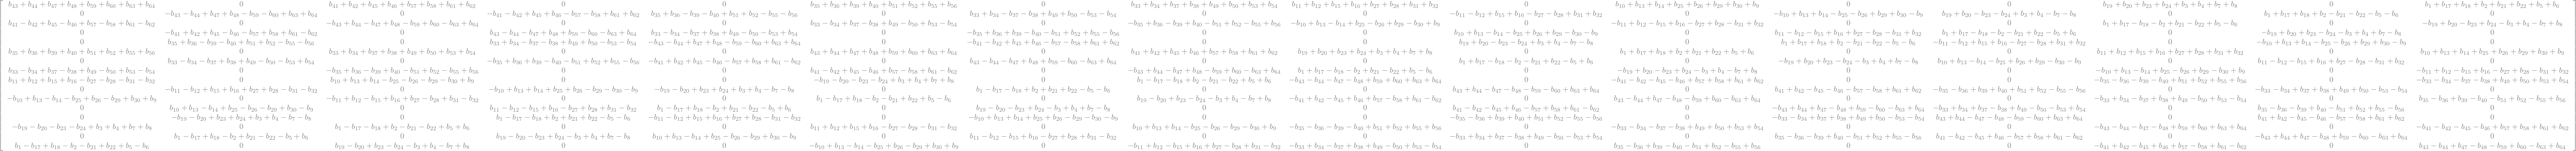

In [5]:
mat4 = zeros(16,16)
for i in mat4info:
    mat4 = mat4 + i[0]*TensorProduct(i[2][0],i[2][1],i[2][2],i[2][3])
mat4

In [6]:
transf = []
for i in s:
    transf.append(TensorProduct(Id,i))

In [7]:
# sanity check for the invariance

def t4(mat):
    return TensorProduct(mat,mat)

for i in transf:
    var = t4(i)*mat4*t4(i)
    if (var - mat4 == zeros(16,16)):
        print('ok, è invariante :)')
    else:
        print('Non è invariante, sorry :(')

ok, è invariante :)
ok, è invariante :)
ok, è invariante :)


In [8]:
difermi = TensorProduct(fermi, fermi)
difermid = TensorProduct(fermid, fermid)

In [9]:
# Matrices to map all the combos
m = [Matrix([[1,0,0,0],[0,0,0,0],[0,0,0,0],[0,0,0,0]]),\
     Matrix([[0,1,0,0],[0,0,0,0],[0,0,0,0],[0,0,0,0]]),\
     Matrix([[0,0,1,0],[0,0,0,0],[0,0,0,0],[0,0,0,0]]),\
     Matrix([[0,0,0,1],[0,0,0,0],[0,0,0,0],[0,0,0,0]]),\
     Matrix([[0,0,0,0],[1,0,0,0],[0,0,0,0],[0,0,0,0]]),\
     Matrix([[0,0,0,0],[0,1,0,0],[0,0,0,0],[0,0,0,0]]),\
     Matrix([[0,0,0,0],[0,0,1,0],[0,0,0,0],[0,0,0,0]]),\
     Matrix([[0,0,0,0],[0,0,0,1],[0,0,0,0],[0,0,0,0]]),\
     Matrix([[0,0,0,0],[0,0,0,0],[1,0,0,0],[0,0,0,0]]),\
     Matrix([[0,0,0,0],[0,0,0,0],[0,1,0,0],[0,0,0,0]]),\
     Matrix([[0,0,0,0],[0,0,0,0],[0,0,1,0],[0,0,0,0]]),\
     Matrix([[0,0,0,0],[0,0,0,0],[0,0,0,1],[0,0,0,0]]),\
     Matrix([[0,0,0,0],[0,0,0,0],[0,0,0,0],[1,0,0,0]]),\
     Matrix([[0,0,0,0],[0,0,0,0],[0,0,0,0],[0,1,0,0]]),\
     Matrix([[0,0,0,0],[0,0,0,0],[0,0,0,0],[0,0,1,0]]),\
     Matrix([[0,0,0,0],[0,0,0,0],[0,0,0,0],[0,0,0,1]])]

Here we map each quadrilinear term to the matrix, called $A$, which gives the quadrilinear term as a result if we evaluate $(\phi^\dagger\otimes\phi^\dagger)^T A (\phi\otimes\phi)$\
where $\phi = \begin{bmatrix}a_{u1}\\ a_{d1}\\a_{u2}\\a_{d2} \end{bmatrix}$ and $\phi^\dagger$ The same reasoning with the creation operators. We then build a list of tuples in order to classify the obtained information

In [10]:
prod4tuple = itertools.product(m, repeat=2)

map4tuple = []
for i in prod4tuple:
    pten = TensorProduct(i[0],i[1])
    var = fermionize((difermid.T*pten*difermi)[0])
    if var.as_ordered_factors()[0] == -1:
        map4tuple.append((var.as_ordered_factors()[0]*var, var.as_ordered_factors()[0]*pten, i[0], i[1]))
    else:
        map4tuple.append((var, pten, i[0], i[1]))

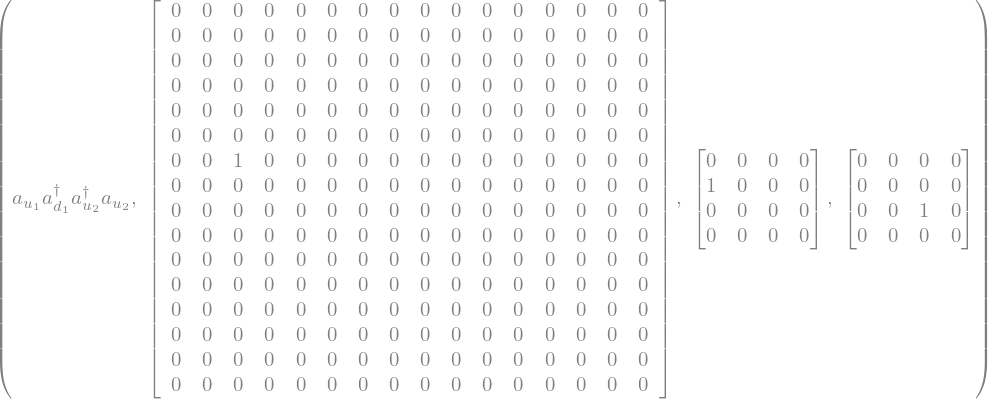

In [11]:
map4tuple[74] # example

In [12]:
map4tuple_compact = []
fermion4set = set() 
for i in map4tuple:
    fermion4set.add(i[0])

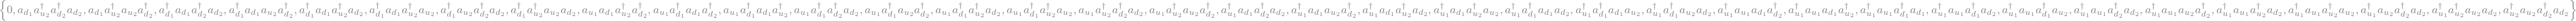

In [13]:
fermion4set

Let's put together all the terms from the list obtained, which are equal for each first entry of the tuple. In practice, we sum all the matrices that give us a given quadrilinear term. We do the same for all those matrices that, in bilinear form, would give us a null fermionic operator (e.g. $a_{u1}^{\dagger 2} a_{u1}^2$)

In [14]:
map4 = []
for i in fermion4set:
    mat4map = zeros(16,16)
    for j in map4tuple:
        if i==j[0]:
            mat4map = mat4map + j[1]
    map4.append((i,mat4map))

The matrix that gives null operators tells us which entries of the matrix $\sum_i b_i\tilde{\gamma}_{2,i}$ can be ignored in subsequent calculations, as no matter what values they have, they will always contribute 0 to the reconstruction of the invariant polynomial. That's why we use it as a "mask" for the $\sum_i b_i\tilde{\gamma}_{2,i}$, meaning that in $\sum_i b_i\tilde{\gamma}_{2,i}$ we set to zero the entries corresponding to the 1s in the matrix of null operators.

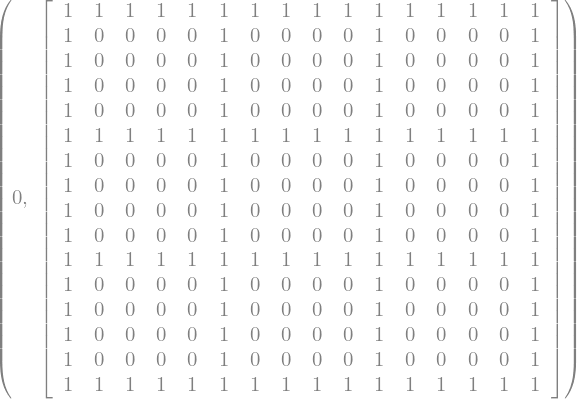

In [15]:
map4[0] # this is a mask for things to exclude in mat4

In [16]:
# Here we rewrite only the conditions we are interested in linking, namely those that do not lead to terms that become 0 
# once reordered in bilinear form

list4zerofree = []
for i in mat4 - map4[0][1]:
    if (-1) in i.as_ordered_terms():
        list4zerofree.append(0)
    else:
        list4zerofree.append(i)
mat4zerofree = Matrix(16,16,list4zerofree)

This step is to familiarize myself with the notation used in the previous scripts and select the correct elements from the lists of tuples formed at the beginning of the program.

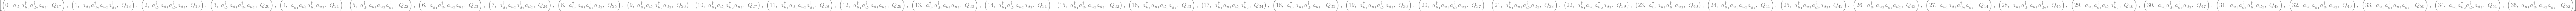

In [17]:
list(zip(list(i for i in range(len(mixed4))), mixed4,aliases[16:52]))

In [18]:
# Questi sono i numeri da inserire nel blocco successivo per gli indici di map4

for i in range(len(map4)):
    if map4[i][0] == mixed4[1] or map4[i][0] == mixed4[34]:
        print(i)

10
34


We take the matrices that generate the pairs (or even just the single operator) of invariant quadrilinear operators and subtract them from the matrix $\sum_i b_i\tilde{\gamma}_{2,i}$. It has been shown (in a previous script) that $\sum_i b_i\tilde{\gamma}_{2,i}$ generates all and only the invariant quadrilinear operators. In this case, we simply specialize the matrix $\sum_i b_i\tilde{\gamma}_{2,i}$ to a given pair or a given operator in order to rewrite the starting polynomial as a linear combination of quadratic forms of invariant matrices. 

In [19]:
# with an analogous technique we try to recover the conditions to map each single term

# solvelist is the list with equations to solve
solvelist = []
for i in mat4zerofree - map4[10][1] - map4[34][1]:
    if i != 0:
        solvelist.append(i)
        if (-2 in i.as_ordered_terms()) or (2 in i.as_ordered_terms()):
            print('Ci sono dei 2, occhio')

Let $B$ be the matrix that generates the pair of operators or the operator of interest. We set to zero all the values of the matrix mat4 $=\sum_i b_i\tilde{\gamma}_{2,i}-B$. The result will be a tuple of $b_i$ values that identify the appropriate linear combination of matrices of the form $\tilde{\gamma}_{2}=\sigma_a\otimes\sigma_b\otimes\sigma_c\otimes\sigma_d$, which yields the desired invariant operator.

In [20]:
from sympy.solvers.solveset import linsolve
sol = list(list(linsolve (solvelist, tuple(coeff_names)))[0])

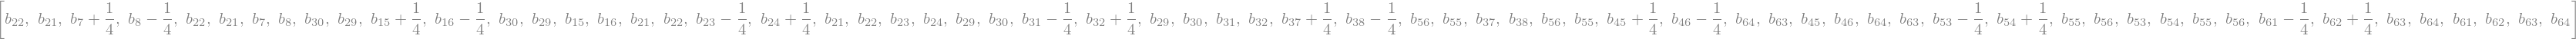

In [21]:
sol

In this case, for example, in order to recover $\lambda_{18} a_{d_1} a^\dagger_{u_2} a_{u_2} a^\dagger_{d_2} + \lambda_{18} a_{u_1} a^\dagger_{u_2} a^\dagger_{d_2} a_{d_2}$, we should write\
$\lambda_{18}(\frac{1}{8}\tilde{\gamma}_{2,3}-\frac{1}{8}\tilde{\gamma}_{2,4}-\frac{1}{8}\tilde{\gamma}_{2,7}+...)$\
Note that by using mat4zerofree (i.e., the matrix mat4 from which the "mask" of zeros has been removed), the uniqueness of the solution to the linear system is lost, and many terms become free. However, in the end, the invariant term is still recovered.

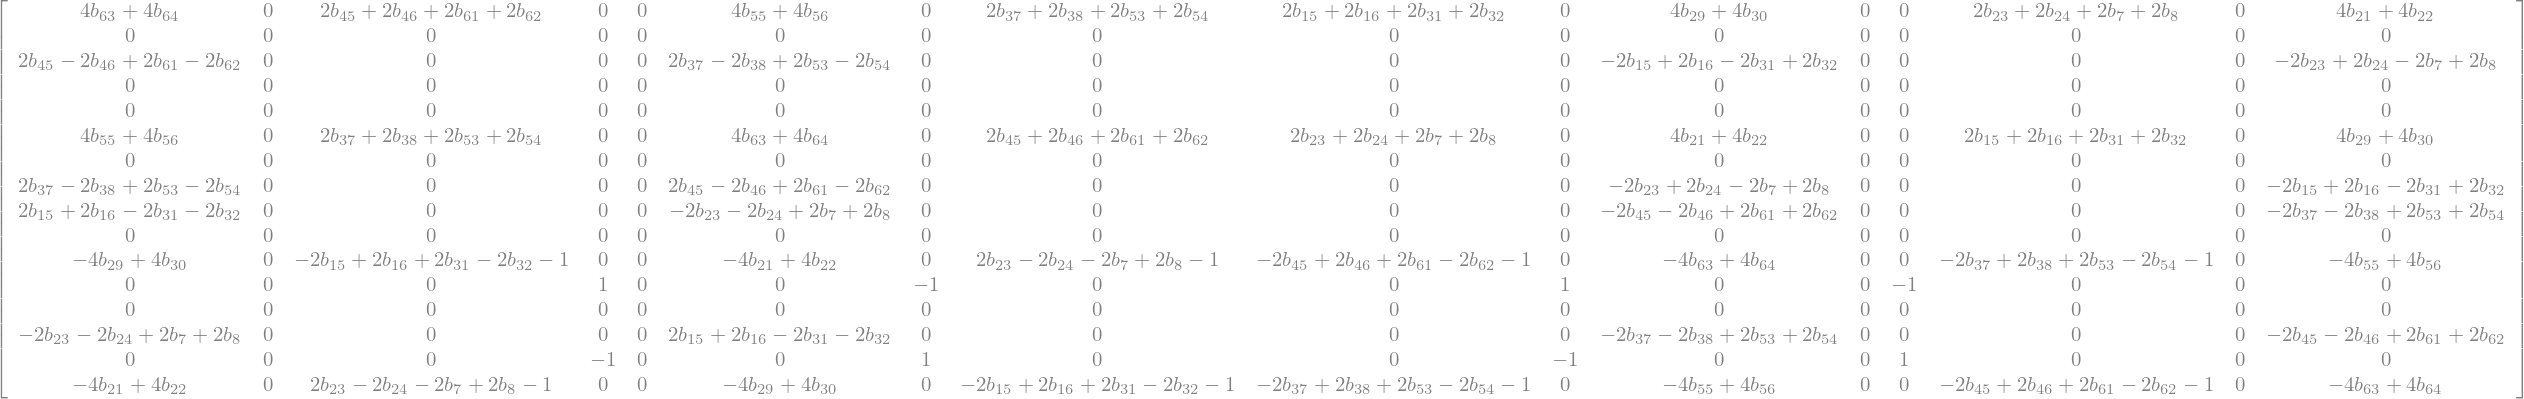

In [22]:
matrix1851 = zeros(16,16)
for i in range(len(inv4)):
    matrix1851 = matrix1851 + sol[i]*TensorProduct(inv4[i][1][0],inv4[i][1][1],inv4[i][1][2],inv4[i][1][3])
matrix1851

In [23]:
# invariance check

for i in transf:
    var = t4(i)*matrix1851*t4(i)
    if (var - matrix1851 == zeros(16,16)):
        print('ok, è invariante :)')
    else:
        print('Non è invariante, sorry :(')

ok, è invariante :)
ok, è invariante :)
ok, è invariante :)


In [24]:
# check
fermionize(expand((difermid.T*matrix1851*difermi)[0]))

# FURTHER VERIFICATIONS

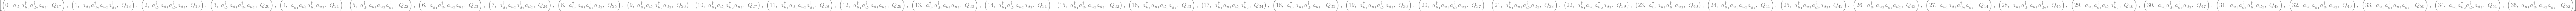

In [18]:
list(zip(list(i for i in range(len(mixed4))), mixed4,aliases[16:52]))

In [19]:
from sympy.solvers.solveset import linsolve

def t4(mat):
    return TensorProduct(mat,mat)

In [20]:
# These are the numbers to be inserted in the subsequent block for the indices of map4.

def rebuilder(a,b): # a and b are the first number in the tuple in the box above associated with the other elements of the tuple.
    part = []
    for i in range(len(map4)):
        if map4[i][0] == mixed4[a] or map4[i][0] == mixed4[b]:
            part.append(i)
        
    # Using a similar technique, let's try to derive the conditions to map each individual term.
    mats = mat4zerofree # By using mat4zerofree, the solution mats = mat4 becomes more general.
    for i in part:
        mats = mats - map4[i][1]
    # solvelist is the list with the equations to solve
    solvelist = []
    for i in mats:
        if i != 0:
            solvelist.append(i)
            if (-2 in i.as_ordered_terms()) or (2 in i.as_ordered_terms()):
                print('Ci sono dei 2, occhio')

    dicsol = list(linsolve (solvelist, tuple(coeff_names)))
    if dicsol != []:
        sol = list(dicsol[0])
        display(Math(latex(sol)))
    else:
        return print('Non ci sono soluzioni :( Esco dalla funzione')

    matrixinv = zeros(16,16)
    for i in range(len(inv4)):
        matrixinv = matrixinv + sol[i]*TensorProduct(inv4[i][1][0],inv4[i][1][1],inv4[i][1][2],inv4[i][1][3])
    matrixinv
    
    for i in transf:
        var = t4(i)*matrixinv*t4(i)
        if (var - matrixinv == zeros(16,16)):
            print('ok, è invariante :)')
        else:
            print('Non è invariante, sorry :(')
        
    return fermionize(expand((difermid.T*matrixinv*difermi)[0]))

In [21]:
rebuilder(1,34)

<IPython.core.display.Math object>

ok, è invariante :)
ok, è invariante :)
ok, è invariante :)


In [65]:
rebuilder(2,23)

<IPython.core.display.Math object>

ok, è invariante :)
ok, è invariante :)
ok, è invariante :)


In [66]:
rebuilder(4,21)

<IPython.core.display.Math object>

ok, è invariante :)
ok, è invariante :)
ok, è invariante :)


In [67]:
rebuilder(6,25)

<IPython.core.display.Math object>

ok, è invariante :)
ok, è invariante :)
ok, è invariante :)


In [68]:
rebuilder(9,33)

<IPython.core.display.Math object>

ok, è invariante :)
ok, è invariante :)
ok, è invariante :)


In [69]:
rebuilder(11,31)

<IPython.core.display.Math object>

ok, è invariante :)
ok, è invariante :)
ok, è invariante :)


In [70]:
rebuilder(13,19)

<IPython.core.display.Math object>

ok, è invariante :)
ok, è invariante :)
ok, è invariante :)


In [71]:
rebuilder(16,29)

<IPython.core.display.Math object>

ok, è invariante :)
ok, è invariante :)
ok, è invariante :)


In [72]:
rebuilder(14,14)

<IPython.core.display.Math object>

ok, è invariante :)
ok, è invariante :)
ok, è invariante :)


In [73]:
rebuilder(18,18)

<IPython.core.display.Math object>

ok, è invariante :)
ok, è invariante :)
ok, è invariante :)


In [74]:
rebuilder(26,26)

<IPython.core.display.Math object>

ok, è invariante :)
ok, è invariante :)
ok, è invariante :)


In [28]:
rebuilder(27,27)

<IPython.core.display.Math object>

ok, è invariante :)
ok, è invariante :)
ok, è invariante :)


## Other sanity checks

In [29]:
def sollist(a,b):
    part = []
    for i in range(len(map4)):
        if map4[i][0] == mixed4[a] or map4[i][0] == mixed4[b]:
            part.append(i)
        
    mats = mat4zerofree
    for i in part:
        mats = mats - map4[i][1]
    solvelist = []
    for i in mats:
        if i != 0:
            solvelist.append(i)
            if (-2 in i.as_ordered_terms()) or (2 in i.as_ordered_terms()):
                print('Ci sono dei 2, occhio')

    dicsol = list(linsolve (solvelist, tuple(coeff_names)))
    if dicsol != []:
        sol = list(dicsol[0])
        display(Math(latex(sol)))
    else:
        return print('Non ci sono soluzioni :( Esco dalla funzione')
        
    return sol

In [30]:
soluz = sollist(27,27)

<IPython.core.display.Math object>

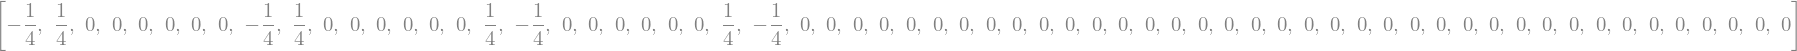

In [32]:
soluz_simple = []
for i in soluz:
    for j in coeff_names:
        i = i.subs(j,0)
    soluz_simple.append(i)
soluz_simple

In [33]:
matrixinv = zeros(16,16)
for i in range(len(inv4)):
    matrixinv = matrixinv + soluz_simple[i]*TensorProduct(inv4[i][1][0],inv4[i][1][1],inv4[i][1][2],inv4[i][1][3])
    
for i in transf:
    var = t4(i)*matrixinv*t4(i)
    if (var - matrixinv == zeros(16,16)):
        print('ok, è invariante :)')
    else:
        print('Non è invariante, sorry :(')
        
fermionize(expand((difermid.T*matrixinv*difermi)[0]))

ok, è invariante :)
ok, è invariante :)
ok, è invariante :)


In [36]:
soluz = sollist(1,34)
soluz_simple = []
for i in soluz:
    for j in coeff_names:
        i = i.subs(j,0)
    soluz_simple.append(i)
    
display(Math(latex(soluz_simple)))

matrixinv = zeros(16,16)
for i in range(len(inv4)):
    matrixinv = matrixinv + soluz_simple[i]*TensorProduct(inv4[i][1][0],inv4[i][1][1],inv4[i][1][2],inv4[i][1][3])
    
for i in transf:
    var = t4(i)*matrixinv*t4(i)
    if (var - matrixinv == zeros(16,16)):
        print('ok, è invariante :)')
    else:
        print('Non è invariante, sorry :(')
        
fermionize(expand((difermid.T*matrixinv*difermi)[0]))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

ok, è invariante :)
ok, è invariante :)
ok, è invariante :)


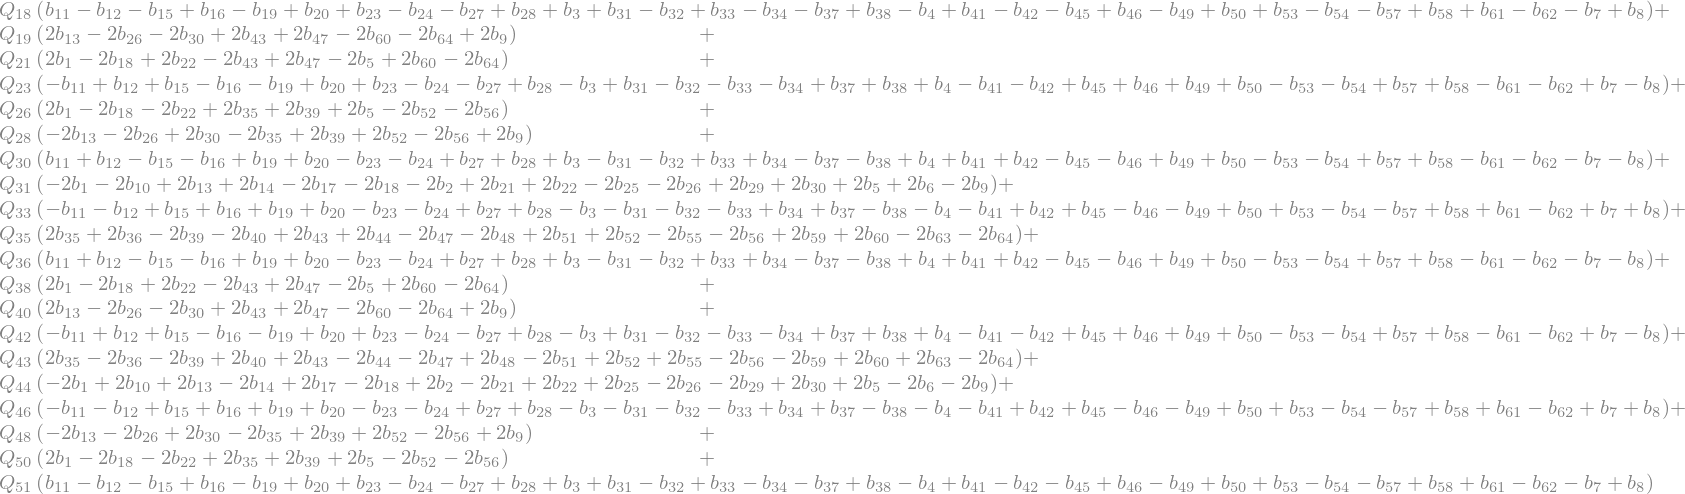

In [69]:
qil = fermionize(expand((difermid.T*mat4*difermi)[0]))

lng = len(mixed2) + len(mixed4)
for i in range(lng):
    qil = qil.subs((mixed2+mixed4)[lng-1-i],aliases[lng-1-i])

for i in aliases:
    qil = collect(qil,i)
qil